<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Регрессия---моя-профессия" data-toc-modified-id="Регрессия---моя-профессия-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Регрессия - моя профессия</a></span><ul class="toc-item"><li><span><a href="#Данные" data-toc-modified-id="Данные-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Данные</a></span></li><li><span><a href="#Вопросы" data-toc-modified-id="Вопросы-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Вопросы</a></span></li></ul></li><li><span><a href="#Парная-регрессия-в-уровнях" data-toc-modified-id="Парная-регрессия-в-уровнях-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Парная регрессия в уровнях</a></span></li><li><span><a href="#Парная-регрессия-в-логарифмах" data-toc-modified-id="Парная-регрессия-в-логарифмах-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Парная регрессия в логарифмах</a></span></li><li><span><a href="#Множественная-регрессия" data-toc-modified-id="Множественная-регрессия-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Множественная регрессия</a></span></li><li><span><a href="#Проверка-предпосылок-модели" data-toc-modified-id="Проверка-предпосылок-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка предпосылок модели</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></div>

# Вопрос про обозначения:

В дз есть обозначение: $Y_i = X_i + 0.1\epsilon, \ \epsilon \sim N(0, 1)$. О чём оно? 

In [1]:
import numpy as np
import pandas as pd
import statsmodels. api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

In [2]:
X = stats.uniform().rvs(size = 100) + stats.expon(1).rvs(size = 100)

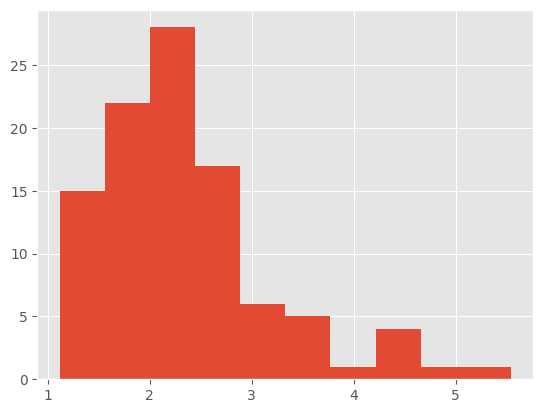

In [3]:
plt.hist(X);

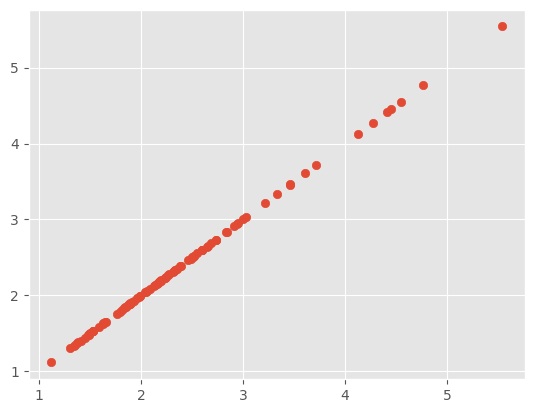

In [4]:
Y = X
plt.scatter(X, Y);

In [5]:
stats.pearsonr(X, Y)

PearsonRResult(statistic=1.0, pvalue=0.0)

In [6]:
Y_right = X + 0.1 * stats.norm().rvs(size = len(X))

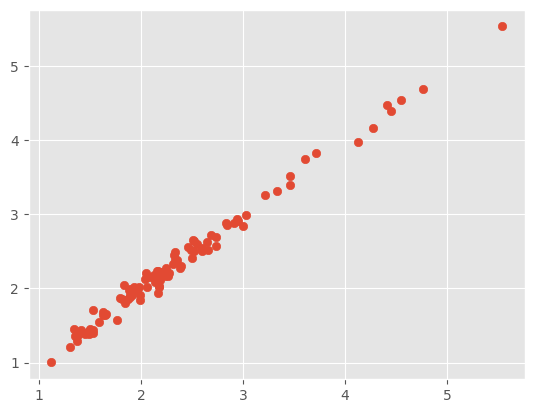

In [7]:
plt.scatter(X, Y_right);

In [8]:
stats.pearsonr(X, Y_right)

PearsonRResult(statistic=0.9944577599354971, pvalue=1.0954256966543161e-97)

#  Регрессия

В этой тетрадке мы попробуем найте BLUE-оценки и проверить пару гипотез. 

## Данные

In [9]:
df = pd.read_csv('Advertising.csv', index_col = 0)
print(df.shape)
df.head()

(200, 4)


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


__Описание колонок:__ 

- `Sales` - продажи продукта на данном рынке (в тысячах штук) 
- `TV` -  доллары, потраченные на ТВ рекламу для одного продукта на данном рынке (в тысячах долларов)
- `Radio` - доллары, потраченные на радио рекламу
- `Newspaper` - доллары, потраченные на рекламу в газетах

В нашей выборке мы имеем 200 **наблюдений** (200 разных рынков с разным объёмом рекламы)

## Вопросы

Давайте представим, что мы работаем на компанию, которая производит и продает этот товар. Компания может задать нам вопрос: как мы должны тратить наши рекламные деньги в будущем?

Этот общий вопрос может привести вас к более конкретным вопросам:

1. Существует ли связь между рекламой и продажами?
2. Насколько сильны эти отношения?
3. Какие типы рекламы способствуют росту продаж?
4. Зная расходы на рекламу на конкретном рынке, можем ли мы предсказать продажи?

# Парная регрессия в уровнях

Взглянем как продажи зависят от типов рекламы.

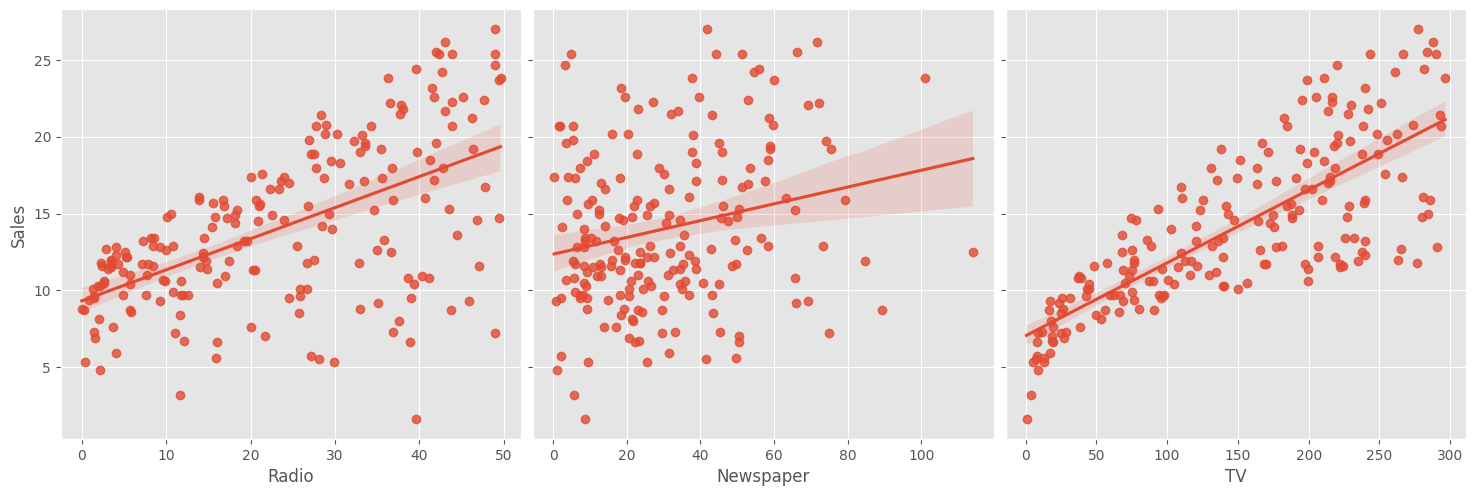

In [10]:
sns.pairplot(
    df, 
    y_vars = 'Sales', 
    x_vars = ['Radio', 'Newspaper', 'TV'], 
    height = 5,
    kind = 'reg',
    diag_kind = None
);

In [11]:
df.corr()['Sales']

TV           0.782224
Radio        0.576223
Newspaper    0.228299
Sales        1.000000
Name: Sales, dtype: float64

Для начала давайте поговорим только про рекламу на TV. Оценим параметры модели 

$$
Sales_i = \beta_1 + \beta_2 \cdot TV_i + \varepsilon_i
$$

In [12]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [13]:
import statsmodels.formula.api as smf

model = smf.ols('Sales ~ TV', data=df)
res = model.fit() #.fit_regularized()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 03 Aug 2024   Prob (F-statistic):           1.47e-42
Time:                        15:18:16   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

In [15]:
res.params

Intercept    7.032594
TV           0.047537
dtype: float64

- p_value < 0.05 -> $H_0: \beta = 0$ -> отвергается - коэффициент значим, коэффициент НЕ равен 0
- p_value > 0.05 -> $H_0: \beta = 0$ -> НЕ отвергается - коэффициент НЕ значим, коэффициент равен 0

- Переменная $TV$ значима, так как $p$-значение для проверки гипотезы о том, что она равна нулю оказалось очень маленьким, наблюдаемое значение статистики $17.668$. Оно лежит глубоко в хвосте нашего распределения. 
- Получившееся уравнение 

$$
Sales_i = 7.033 + 0.047 \cdot TV_i
$$

можно проинтерпретировать так, что каждые дополнительные $1000$ долларов, потраченные на рекламу по телевизору, увеличивают продажы на $47.537$ товаров.

> Мы можем так интерпретировать значение коэффициента, если выполняются предпосылки линейной регрессии. Например, первая предпослыка говорит о том, что мы должны были верно специфицировать модель. 

Если модель специфицирована неверно, у нас есть проблемы. 

> Мы получаем корректные оценки стандартных ошибок в ситуации, когда ошибки независимо одинаково распределены с одинаковой дисперсией. Если это не так, оценки ошибок искажены. 

- Информационные критерии
    - [Akaike information criterion](https://en.wikipedia.org/wiki/Akaike_information_criterion):
    $\mathrm{AIC} \, = \, 2k - 2\ln(\hat L)$
    - [Bayesian information criterion](https://en.wikipedia.org/wiki/Bayesian_information_criterion):
    $\mathrm{BIC} = k\ln(n) - 2\ln(\widehat L)$
- Коэффициенты детерминации
    - $ R^2 = 1-{RSS \over TSS}$
    - $ R^2_\text{adj} = 1-{RSS/(n-k-1) \over TSS/(n-1)}$

# Парная регрессия в логарифмах

У нашей модели явно есть проблемы со спецификацией. Давайте попробуем их исправить. Если взглянуть на график того, как между собой взаимосвязаны реклама по TV и продажи, можно заметить нелинейную зависимость, похожую на логарифмическую. 

- при увеличении инвестиций в ТВ, разброс продаж увеличивается (гетероскедастичность)

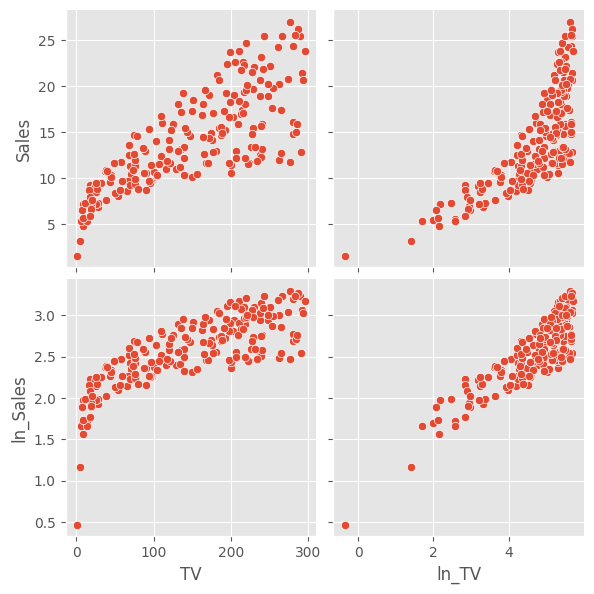

In [16]:
df['ln_TV'] = df['TV'].apply(np.log)
df['ln_Sales'] = df['Sales'].apply(np.log)


sns.pairplot(
    df, 
    y_vars = ['Sales', 'ln_Sales'], 
    x_vars = ['TV', 'ln_TV'], 
    height = 3,
    diag_kind = None,
);


Очистим данные от выбросов. 

In [17]:
df = df[df.Sales > df.Sales.quantile(0.01)]

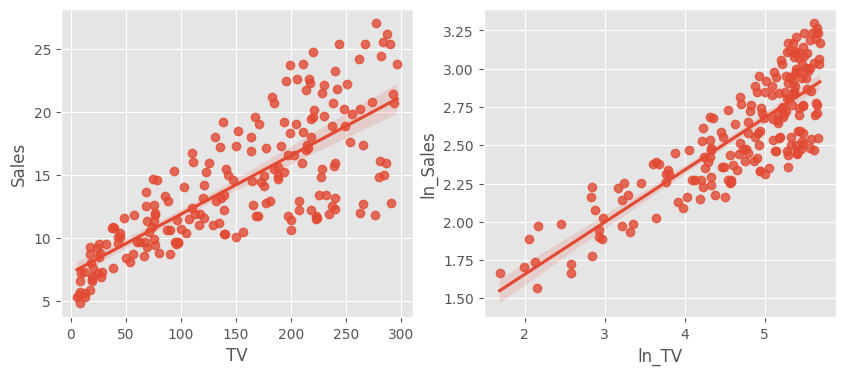

In [18]:
plt.figure(figsize=(10,4))
plt.subplot(121)
# sns.scatterplot(data=df, x='TV', y='Sales');
sns.regplot(data=df, x='TV', y='Sales');

plt.subplot(122)
# sns.scatterplot(data=df, x='ln_TV', y='ln_Sales');
sns.regplot(data=df, x='ln_TV', y='ln_Sales');

Оценим параметры модели 

$$
\ln Sales_i = \beta_0 + \beta_1 \cdot \ln TV_i + \varepsilon_i
$$

In [19]:
import statsmodels.formula.api as smf

model = smf.ols('ln_Sales ~ ln_TV', data = df)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_Sales   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     435.1
Date:                Sat, 03 Aug 2024   Prob (F-statistic):           1.16e-51
Time:                        15:26:10   Log-Likelihood:                 29.332
No. Observations:                 198   AIC:                            -54.66
Df Residuals:                     196   BIC:                            -48.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9757      0.078     12.443      0.0

Переменная снова значима. $R^2$ подрос. Все коэффициенты в моделях, где целевые и объясняющие переменные взяты в логарифмах, интерпретируются в процентных изменениях. Например, коэффициент $0.3407$ можно проинтерпретировать как то, на сколько процентов увеличутся продажи, при изменении трат на рекламу по телевизору на $1\%$. 

![](https://www.kdnuggets.com/wp-content/uploads/r-glm-table-1.png)

# Множественная регрессия

Оценим уравнение 

$$
\ln Sales_i = \beta_0 + \beta_1 \cdot \ln TV_i + \beta_2 \cdot Radio_i + \beta_3 \cdot Newspaper_i + \varepsilon_i
$$

In [20]:
model = smf.ols('ln_Sales ~ ln_TV + Radio + Newspaper', data = df)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_Sales   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2959.
Date:                Sat, 03 Aug 2024   Prob (F-statistic):          1.17e-161
Time:                        15:29:44   Log-Likelihood:                 294.22
No. Observations:                 198   AIC:                            -580.4
Df Residuals:                     194   BIC:                            -567.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6661      0.022     30.446      0.0

In [21]:
df['ln_Radio'] = df['Radio'].apply(np.log1p)
df['ln_Newspaper'] = df['Newspaper'].apply(np.log1p)

/var/folders/7t/_ywngh7s4vzflssy506tj1m40000gn/T/ipykernel_24478/2531933978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ln_Radio'] = df['Radio'].apply(np.log1p)
/var/folders/7t/_ywngh7s4vzflssy506tj1m40000gn/T/ipykernel_24478/2531933978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ln_Newspaper'] = df['Newspaper'].apply(np.log1p)


In [22]:
# model = smf.ols('ln_Sales ~ TV + ln_TV + ln_Radio + ln_Newspaper', data=df)
# res = model.fit()
# print(res.summary())

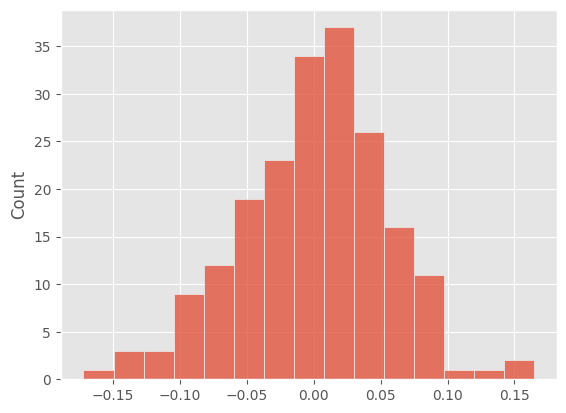

In [23]:
sns.histplot(res.resid);

In [24]:
import scipy.stats as ss

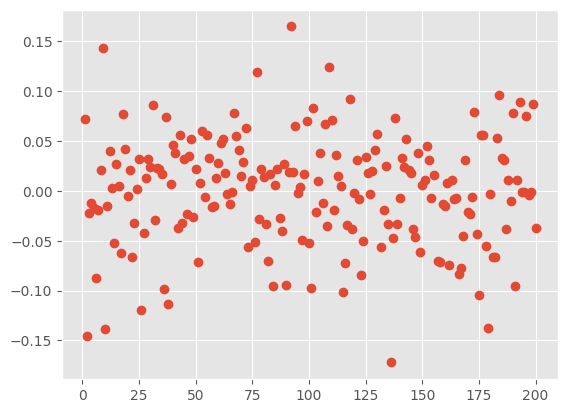

In [25]:
plt.plot(res.resid, 'o');

- Уравнение значимо в целом, значение F-статистики попадает глубоко в хвост 
- Коэффициент перед `Newspaper` отрицательный и незначимый

> Если модель специфицирована верно и выполнены все предпосылки, мы можем сделать вывод, что траты на рекламу в газетах никак не повышают продажи и от них можно отказаться 

In [26]:
model = smf.ols('ln_Sales ~ ln_TV + Radio', data = df)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_Sales   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     4457.
Date:                Sat, 03 Aug 2024   Prob (F-statistic):          1.68e-163
Time:                        15:30:23   Log-Likelihood:                 294.13
No. Observations:                 198   AIC:                            -582.3
Df Residuals:                     195   BIC:                            -572.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6646      0.022     30.895      0.0

# Проверка предпосылок модели

- Есть ли мультиколинеарность? 

Она возникает, если есть
1) коррелируемые признаки

2) дамми-переменные суммируются в единицу и совпадают с константным признаком => надо выбрать базовую категорию

3) есть дамми-переменная с почти одними нулями, то есть редкими категориями

In [27]:
df[['ln_TV', 'Radio', 'Newspaper']].corr()

,ln_TV,Radio,Newspaper
ln_TV,1.000000,0.004521,-0.004387
Radio,0.004521,1.000000,0.358916
Newspaper,-0.004387,0.358916,1.000000


Между переменными нет высокой корреляции. Значит у нас получится корректно оценить нашу модель. Есть другие, более формальне критерии для поиска проблем, связанных с мультиколинеарностью, но мы про них говорить не будем. 

- Корректны ли данные, с которыми мы работаем, для решения поставленной задачи? 
- Корректна ли спецификация модели? 
- Есть ли выбросы? 

Про всё это мы поговорили выше. Судя по всему, оценки коэффициентов, которые мы получили - несмещённые и состоятельные. 

- Есть ли в остатках __гетероскедастичность__?

Для гетероскедастичности построим картинку и воспользуемся каким-нибудь критерием. 

/var/folders/7t/_ywngh7s4vzflssy506tj1m40000gn/T/ipykernel_24478/1900424710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['residuals'] = res.resid


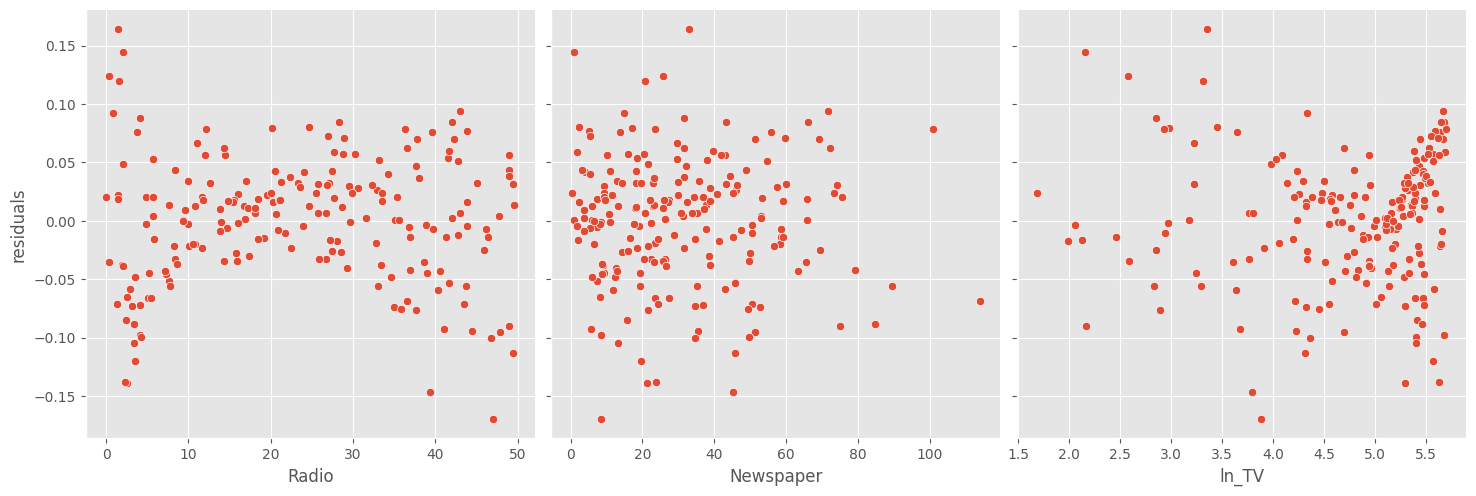

In [28]:
df['residuals'] = res.resid

sns.pairplot(
    df, 
    y_vars = 'residuals', 
    x_vars = ['Radio', 'Newspaper', 'ln_TV'], 
    height = 5,
    diag_kind = None
);

Судя по графику, дисперсия ошибок зависит от объёма рекламы по радио. Причём квадратично. Выходит, что оценки дисперсий коэффициентов искажены и доверительные интервалы оказываются смещёнными. Можно провести формальный тест на гомоскедастичность. Таких тестов есть довольно много. 

In [33]:
y = df['ln_Sales']
x = df[['ln_TV', 'Radio', 'Newspaper']]
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

In [34]:
from statsmodels.stats.diagnostic import het_white
het_white(model.resid, exog = x.values)

(49.25424279822836,
 1.4872372636745273e-07,
 6.916946234122862,
 1.361609900602447e-08)

In [35]:
help(het_white)

Help on function het_white in module statsmodels.stats.diagnostic:

het_white(resid, exog)
    White's Lagrange Multiplier Test for Heteroscedasticity.
    
    Parameters
    ----------
    resid : array_like
        The residuals. The squared residuals are used as the endogenous
        variable.
    exog : array_like
        The explanatory variables for the variance. Squares and interaction
        terms are automatically included in the auxiliary regression.
    
    Returns
    -------
    lm : float
        The lagrange multiplier statistic.
    lm_pvalue :float
        The p-value of lagrange multiplier test.
    fvalue : float
        The f-statistic of the hypothesis that the error variance does not
        depend on x. This is an alternative test variant not the original
        LM test.
    f_pvalue : float
        The p-value for the f-statistic.
    
    Notes
    -----
    Assumes x contains constant (for counting dof).
    
    question: does f-statistic make sense? con

Видим, что `pvalue` (последнее значение) сильно ниже уровня значимости. Гипотеза о гомоскедастичности отвергается. Можно ввести корректировку и исправить значения ошибок прямо при оценивании модели. 

In [36]:
model = smf.ols('ln_Sales ~ ln_TV + Radio + Newspaper', data = df)
res = model.fit(cov_type = 'HC3')
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_Sales   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1807.
Date:                Sat, 03 Aug 2024   Prob (F-statistic):          1.85e-141
Time:                        15:39:03   Log-Likelihood:                 294.22
No. Observations:                 198   AIC:                            -580.4
Df Residuals:                     194   BIC:                            -567.3
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6661      0.029     23.108      0.0

Значения стандартных ошибок довольно сильно изменились. Теперь мы можем использовать их для проверки гипотез. 

> Нормальность остатков нам не нужна. Из-за корректировки ошибок мы можем пользоваться только асимптотическими результатами. В данных нет выбросов, поэтому предельные теоремы тут работают. 

Либо можно попробовать изменить признак `Radio`, добавив квадрат от него

In [37]:
df['Radio_pow_2'] = df['Radio'] ** 2

/var/folders/7t/_ywngh7s4vzflssy506tj1m40000gn/T/ipykernel_24478/1248537953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Radio_pow_2'] = df['Radio'] ** 2


In [38]:
model = smf.ols('ln_Sales ~ ln_TV + Radio + Radio_pow_2', data = df)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_Sales   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     3096.
Date:                Sat, 03 Aug 2024   Prob (F-statistic):          1.61e-163
Time:                        15:40:50   Log-Likelihood:                 298.59
No. Observations:                 198   AIC:                            -589.2
Df Residuals:                     194   BIC:                            -576.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.6436      0.022     28.961      

In [39]:
df.head()

,TV,Radio,Newspaper,Sales,ln_TV,ln_Sales,ln_Radio,ln_Newspaper,residuals,Radio_pow_2
1,230.1,37.8,69.2,22.1,5.438514,3.095578,3.658420,4.251348,0.069950,1428.84
2,44.5,39.3,45.1,10.4,3.795489,2.341806,3.696351,3.830813,-0.146105,1544.49
3,17.2,45.9,69.3,9.3,2.844909,2.230014,3.848018,4.252772,-0.024694,2106.81
4,151.5,41.3,58.5,18.5,5.020586,2.917771,3.744787,4.085976,-0.013458,1705.69
5,180.8,10.8,58.4,12.9,5.197391,2.557227,2.468100,4.084294,-0.019582,116.64


In [40]:
df['ln_Radio'] = df['Radio'].apply(np.log)

/var/folders/7t/_ywngh7s4vzflssy506tj1m40000gn/T/ipykernel_24478/2303562524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ln_Radio'] = df['Radio'].apply(np.log)


In [55]:
np.log(0)

/var/folders/7t/_ywngh7s4vzflssy506tj1m40000gn/T/ipykernel_24478/2933082444.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

In [54]:
df['Radio'].unique()

array([37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6,  2.1,  2.6,  5.8,
       24. , 35.1,  7.6, 32.9, 47.7, 36.6, 39.6, 20.5, 23.9, 27.7,  5.1,
       15.9, 16.9, 12.6,  3.5, 29.3, 16.7, 27.1, 16. , 28.3, 17.4,  1.5,
       20. ,  1.4,  4.1, 43.8, 49.4, 26.7, 37.7, 22.3, 33.4,  8.4, 25.7,
       22.5,  9.9, 41.5, 15.8, 11.7,  3.1,  9.6, 41.7, 46.2, 28.8, 28.1,
       19.2, 49.6, 29.5,  2. , 42.7, 15.5, 29.6, 42.8,  9.3, 24.6, 14.5,
       27.5, 43.9, 30.6, 14.3, 33. ,  5.7, 43.7,  1.6, 28.5, 29.9,  7.7,
       20.3, 44.5, 43. , 18.4, 40.6, 25.5, 47.8,  4.9, 33.5, 36.5, 14. ,
       31.6, 21. , 42.3,  4.3, 36.3, 10.1, 17.2, 34.3, 46.4, 11. ,  0.3,
        0.4, 26.9,  8.2, 38. , 15.4, 20.6, 46.8, 35. ,  0.8, 36.9, 26.8,
       21.7,  2.4, 34.6, 32.3, 11.8, 38.9,  0. , 49. , 12. ,  2.9, 27.2,
       38.6, 47. , 39. , 28.9, 25.9, 17. , 35.4, 33.2, 14.8,  1.9,  7.3,
       40.3, 25.8, 13.9, 23.3, 39.7, 21.1, 43.5,  1.3, 18.1, 35.8, 36.8,
       14.7,  3.4, 37.6,  5.2, 23.6, 10.6, 11.6, 20

In [53]:
df['ln_Radio'].unique()

array([ 3.6323091 ,  3.67122452,  3.82646512,  3.7208625 ,  2.37954613,
        3.8897774 ,  3.49042852,  2.97552957,  0.74193734,  0.95551145,
        1.75785792,  3.17805383,  3.55820113,  2.02814825,  3.49347266,
        3.8649314 ,  3.60004824,  3.67882912,  3.02042489,  3.17387846,
        3.32143241,  1.62924054,  2.76631911,  2.82731362,  2.53369681,
        1.25276297,  3.37758752,  2.81540872,  3.29953373,  2.77258872,
        3.3428618 ,  2.85647021,  0.40546511,  2.99573227,  0.33647224,
        1.41098697,  3.77963382,  3.89995042,  3.28466357,  3.62966009,
        3.10458668,  3.5085559 ,  2.12823171,  3.24649099,  3.11351531,
        2.29253476,  3.72569343,  2.76000994,  2.45958884,  1.13140211,
        2.2617631 ,  3.73050113,  3.8329798 ,  3.36037539,  3.33576958,
        2.95491028,  3.90399083,  3.38439026,  0.69314718,  3.75419892,
        2.74084002,  3.38777436,  3.7565381 ,  2.2300144 ,  3.20274644,
        2.67414865,  3.314186  ,  3.78191432,  3.42100001,  2.66

In [51]:
df = df.replace([np.inf, -np.inf], np.nan)

In [52]:
model = smf.ols('ln_Sales ~ ln_TV + ln_Radio + Radio_pow_2', data = df)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_Sales   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     2196.
Date:                Sat, 03 Aug 2024   Prob (F-statistic):          7.50e-149
Time:                        15:46:59   Log-Likelihood:                 264.68
No. Observations:                 197   AIC:                            -521.4
Df Residuals:                     193   BIC:                            -508.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.6388      0.027     23.467      

Логарифмирование расходов на радио не имеет смысла

## Выводы

1. Тратить деньги на рекламу в газетах неэффективно. Гипотеза о том, что коэффициент перед этой переменной равен нулю, не отвергается. 
2. Реклама по телевидению обладает убывающей отдачей от масштаба. Коэффициент перед логарифмом получился меньше единицы. Этот канал оказывается в плане рекламы самым эффективным. 
3. Канал, связанный с радио, судя по всему, недоиспользуется. Здравый смысл и микроэкономика подсказывают, что от него тоже логично ожидать убывающую от масштаба отдачу. Однако в данных мы видим, что она линейная. 